C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


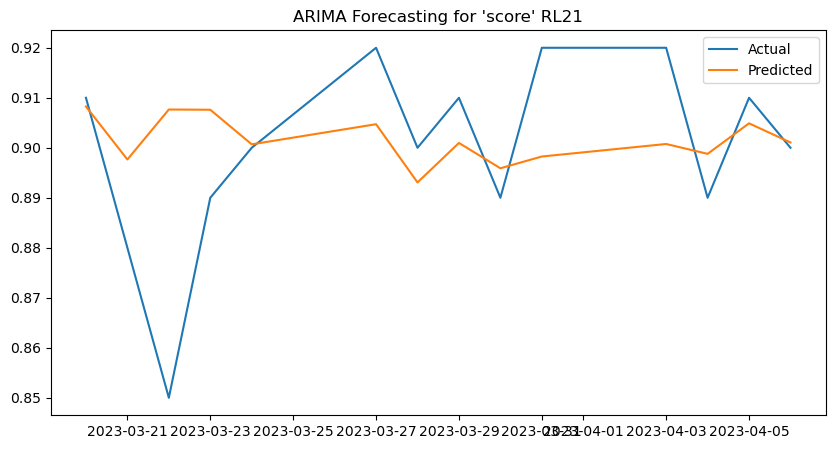

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


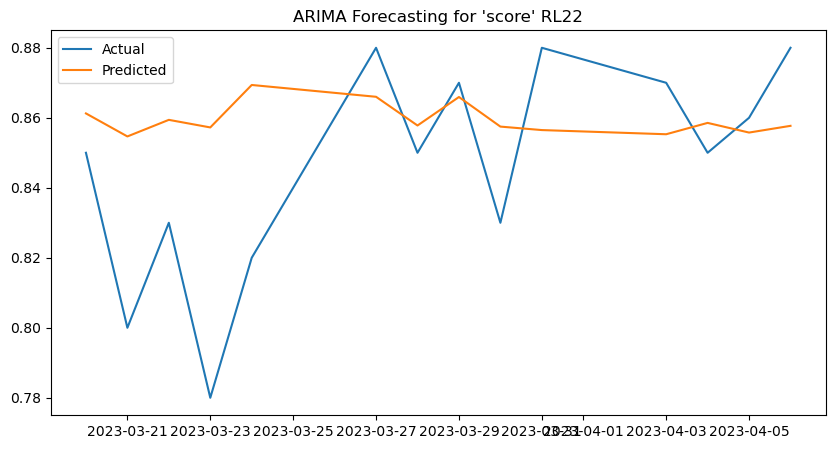

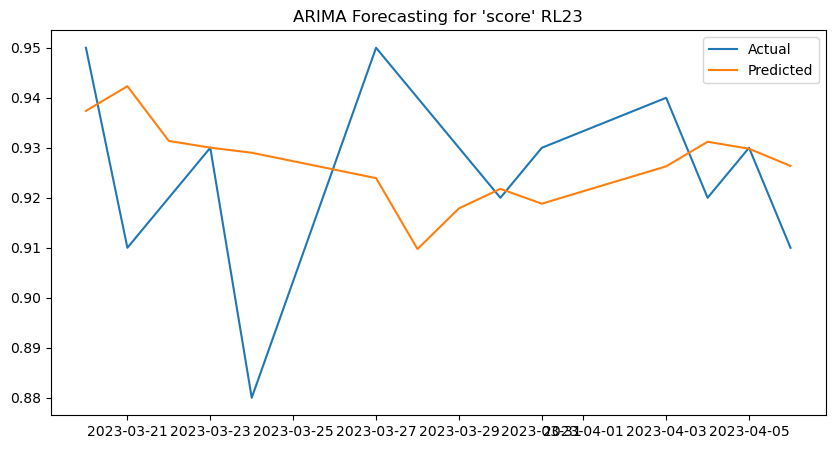

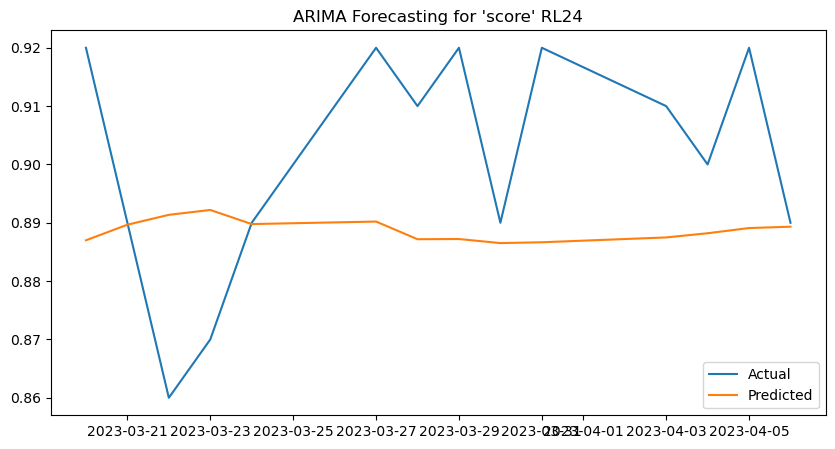

In [67]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

sheetnames=['RL21','RL22','RL23','RL24']

for sheetname in sheetnames:
    input_path = r'C:\Users\DELL\Desktop\project\scor serp.xlsx'
    my_data = pd.read_excel(input_path, sheet_name=sheetname)
    my_data.date=pd.to_datetime(my_data.date, dayfirst= True)
    my_data.set_index("date",inplace=True)
    my_data=my_data.asfreq('b')
    my_data.head(8)
    size =int(len(my_data)*0.8)
    df=my_data.iloc[:size]
    dftst=my_data.iloc[size:]
    model = ARIMA(df.Value, order=(8,1,1)) # (p, d, q) = (2, 1, 2)
    fitted_model = model.fit()


    start_idx, end_idx = dftst.index[0], dftst.index[-1]
    predictions = fitted_model.predict(start=start_idx, end=end_idx, typ="levels")

    plt.figure(figsize=(10, 5))
    plt.plot(dftst.index, dftst.Value, label="Actual")
    plt.plot(predictions.index, predictions.values, label="Predicted")
    plt.legend(loc="best")
    plt.title(f"ARIMA Forecasting for 'score' {sheetname}")
    plt.show()
    nadi=predictions.reset_index()


    path = r'C:\Users\DELL\Desktop\project\\'
    filename = f'{sheetname}_predictions.xlsx'
    file_path = path + filename
    nadi.to_excel(file_path, sheet_name=sheetname,index=False)
